# Restaurant Rating Prediction

**About Dataset:<br>**
This dataset has been obtained by scraping the TA website for information about restaurants.

## Column Description:

The data is a .csv file structured as follow:
-	Name: name of the restaurant
-	City: city location of the restaurant
-	Cuisine Style: cuisine style(s) of the restaurant, in a Python list object (94 046 non-null)
-	Ranking: rank of the restaurant among the total number of restaurants in the city as a float object (115 645 non-null)
-	Rating: rate of the restaurant on a scale from 1 to 5, as a float object (115 658 non-null)(Target Column)
-	Price Range: price range of the restaurant among 3 categories , as a categorical type (77 555 non-null)
-	Number of Reviews: number of reviews that customers have let to the restaurant, as a float object (108 020 non-null)
-	Reviews: 2 reviews that are displayed on the restaurants scrolling page of the city, as a list of list object where the first list contains the 2 reviews, and the second le dates when these reviews were written (115 673 non-null)
-	URL_TA: part of the URL of the detailed restaurant page that comes after 'www.tripadvisor.com' as a string object (124 995 non-null)
-	ID_TA: identification of the restaurant in the TA database constructed a one letter and a number (124 995 non-null)


**The Problem Statement:<br>**
To build an application which predicts restaurant ratings based on given attributes.

In [1]:
#Loading libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# customizing notebook
# path = '/content/drive/My Drive/Datasets/ML-1/Bankruptcy dataset'
# path = r'C:\Users\Warlock\Desktop\Py\ML-Challenge\ML-1\RestaurantRatings'
path = r'F:\Python\Python\IPython\ML-1\RestaurantRatings'
os.chdir(path)

pd.set_option("display.precision",8)
pd.set_option("display.max_columns",None)
np.set_printoptions(precision=8,suppress=False)

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
# sns.set(style='ticks', palette='muted',font_scale=1.2)
sns.set(font_scale=1.3)

In [3]:
# helper packages
from collections import Counter,defaultdict,OrderedDict
from itertools import combinations
import ast

## Loading Dataset

In [4]:
data = pd.read_csv('TA_restaurants_curated.csv',index_col=0,encoding='UTF-8')

data.index = range(len(data))
print(f'No. of rows in dataset    : {data.shape[0]} \nNo. of columns in dataset : {data.shape[1]}')
data.head()

No. of rows in dataset    : 125527 
No. of columns in dataset : 10


,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419
2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau...",/Restaurant_Review-g188590-d696959-Reviews-La_...,d696959
3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o...",/Restaurant_Review-g188590-d1239229-Reviews-Vi...,d1239229
4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience...",/Restaurant_Review-g188590-d6864170-Reviews-Li...,d6864170


In [5]:
# Looking at the information about the dataset, datatypes of the coresponding columns and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125527 entries, 0 to 125526
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Name               125527 non-null  object 
 1   City               125527 non-null  object 
 2   Cuisine Style      94176 non-null   object 
 3   Ranking            115876 non-null  float64
 4   Rating             115897 non-null  float64
 5   Price Range        77672 non-null   object 
 6   Number of Reviews  108183 non-null  float64
 7   Reviews            115911 non-null  object 
 8   URL_TA             125527 non-null  object 
 9   ID_TA              125527 non-null  object 
dtypes: float64(3), object(7)
memory usage: 9.6+ MB


In [6]:
# Checking for Duplicate Records
print(f'No. of duplicate rows found if any: {data.duplicated().sum()}')

data[data.duplicated()]

No. of duplicate rows found if any: 40


,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
35308,Tanaka,Geneva,"['Japanese', 'Asian']",NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g188057-d1045068-Reviews-Ta...,d1045068
62050,Number 3,London,['Mediterranean'],NaN,NaN,$$ - $$$,NaN,NaN,/Restaurant_Review-g186338-d733996-Reviews-Num...,d733996
62140,Sankofa Restaurant,London,NaN,NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g186338-d1318286-Reviews-Sa...,d1318286
62350,Lal Fort,London,NaN,NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g186338-d4913084-Reviews-La...,d4913084
62470,Dominic's Pizza,London,NaN,NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g186338-d5122079-Reviews-Do...,d5122079
62560,Cafe Dem,London,NaN,NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g186338-d5122933-Reviews-Ca...,d5122933
62650,Penang Express,London,NaN,NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g186338-d5244293-Reviews-Pe...,d5244293
62770,ZAYNA - Egyptian Cafe & Shisha Bar,London,NaN,NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g186338-d5443274-Reviews-ZA...,d5443274
62830,Pimento Grove,London,NaN,NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g186338-d5616016-Reviews-Pi...,d5616016
62890,Pandoo's,London,NaN,NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g186338-d5795499-Reviews-Pa...,d5795499


In [7]:
# Droping Duplicate Records

data.drop_duplicates(inplace=True)

In [8]:
# Renaming and Cleaning Columns

data.columns = map(lambda x:x.lower().replace(' ','_'),data.columns)
data.columns

Index(['name', 'city', 'cuisine_style', 'ranking', 'rating', 'price_range',
       'number_of_reviews', 'reviews', 'url_ta', 'id_ta'],
      dtype='object')

In [9]:
# Droping Column URL_TA and ID_TA as both are redundant fields and can't be used for inference

data.drop(columns=['url_ta','id_ta'],axis=1,inplace=True)

## EDA

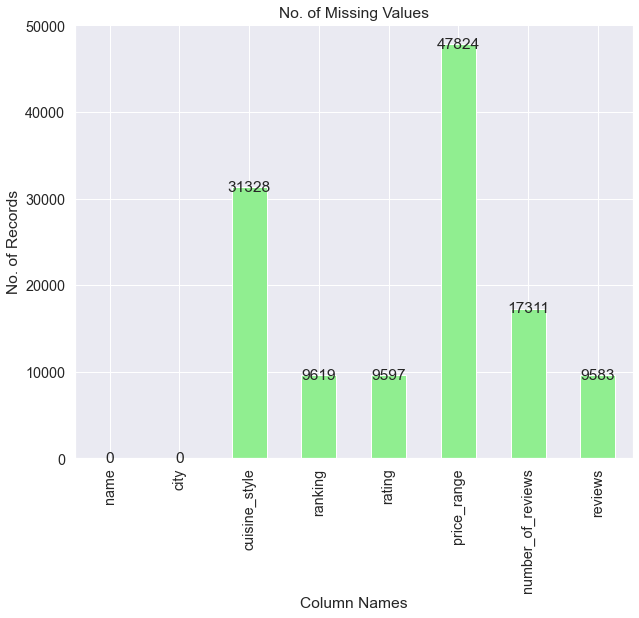

In [10]:
# Plotting No of Null Values in Each Columns

def bar_onlineorder(data):
    '''
    plots bar graph with counts of missing values in each column    
    
    '''
    y = data.isnull().sum().values
    x = [x for x in range(len(y))]
    
    #zipping x,y cordinates and values for 
    zip_x_y_str = zip(x,[y1 - .03 for y1 in y] ,y)

    ax = data.isnull().sum().plot(kind='bar', color=['lightgreen'], grid=True, title='No. of Missing Values' )
    ax.set_xlabel('Column Names') 
    ax.set_ylabel('No. of Records')
    #print the text on the bar
    for x,y,s in zip_x_y_str:        
        s = round(s,3)
        ax.text(x,y,str(s), horizontalalignment='center',verticalalignment='center')
        
        
bar_onlineorder(data)        


**Observations: Except Name and City all have significant no of Null Values. Let's start visualizing and imputing them one by one**

In [11]:
# Imputing for number_of_reviews
# if no reviews are present filling with 0

data.number_of_reviews.fillna(value=0,inplace=True)

**Visualizing which city has them most no of restaurants to eat.**

Text(0.5, 0, 'No of Restaurant')

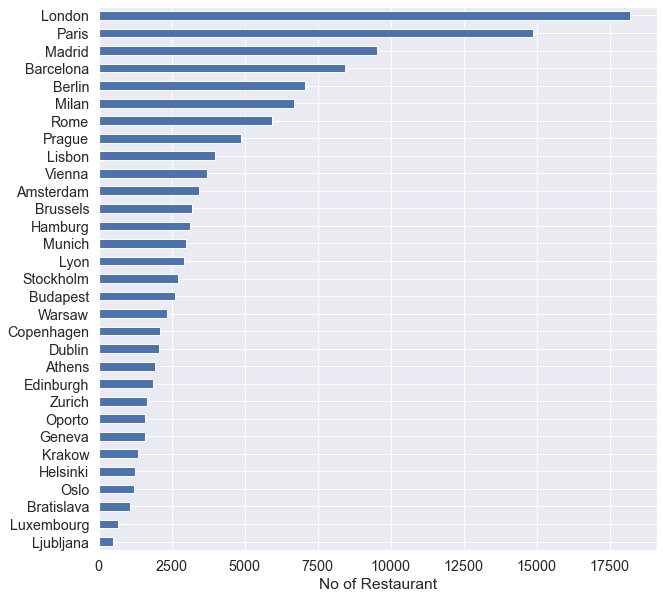

In [12]:
plt.figure(figsize=(10,10))
data.city.value_counts().sort_values().plot(kind='barh')
plt.xlabel('No of Restaurant')

**Observations:<br>**
London, Paris has the highest number of restaurants<br>
Ljubljana, Luxenbourg have the least number of restaurants

**Where do the people talk more about the restaurants?**

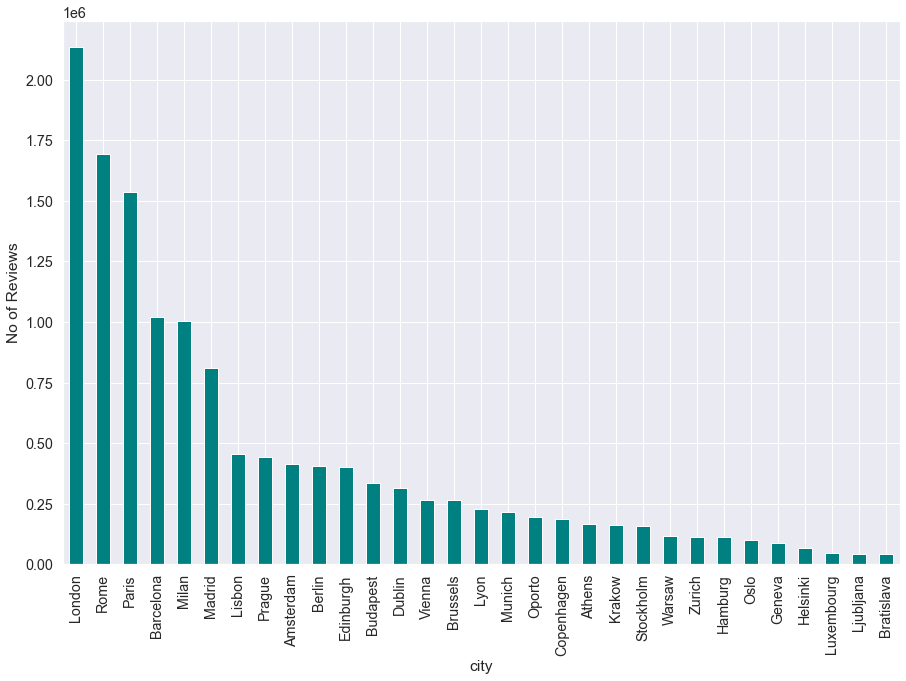

In [13]:
plt.figure(figsize=(15,10))
data.groupby('city')['number_of_reviews'].sum().sort_values(ascending=False).plot(kind='bar',color='teal')
plt.ylabel('No of Reviews');

**Observations:<br>**
London, Rome has the highest number of reviews.<br>
Ljubljana, Bratislava have the least number of reviews.<br>
Let's see how on an avg these city restaurant are collecting reviews. Because it might happen that some restaurants collects
large no of review whereas some has less no of reviews.

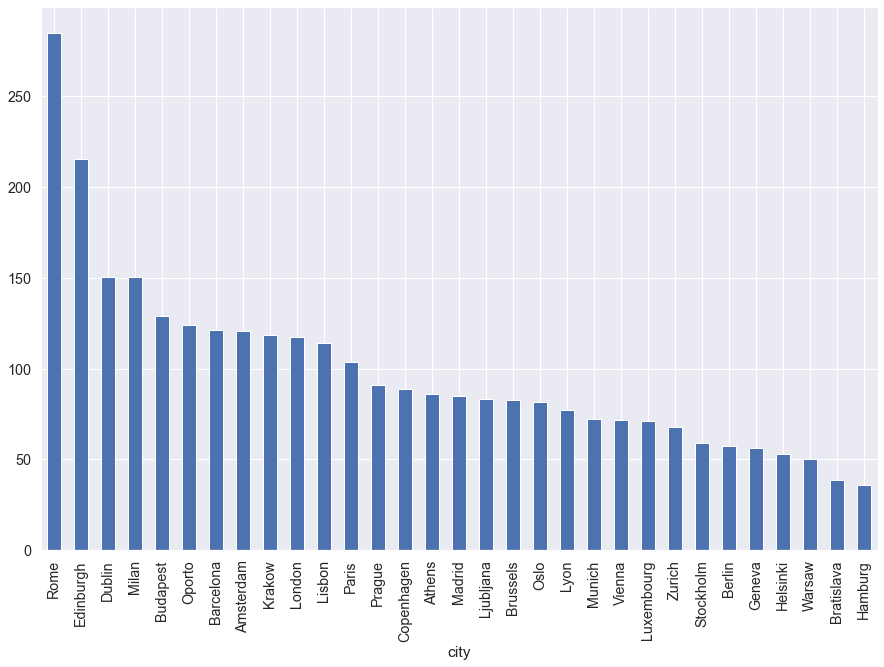

In [14]:
# Let's check the average number of reviews per city:
plt.figure(figsize=(15,10))
data.groupby('city')['number_of_reviews'].mean().sort_values(ascending=False).plot(kind='bar')

**Observations:<br>**
Rome and Edingerb has highest and second highest no of reviews meaning most of the restaurant are collecting customer reviews.
So these are the two cities which give people the most to talk about!

**Let's see how rating is distributed per city**

Text(0.5, 1.0, 'City vs Avg.Rating')

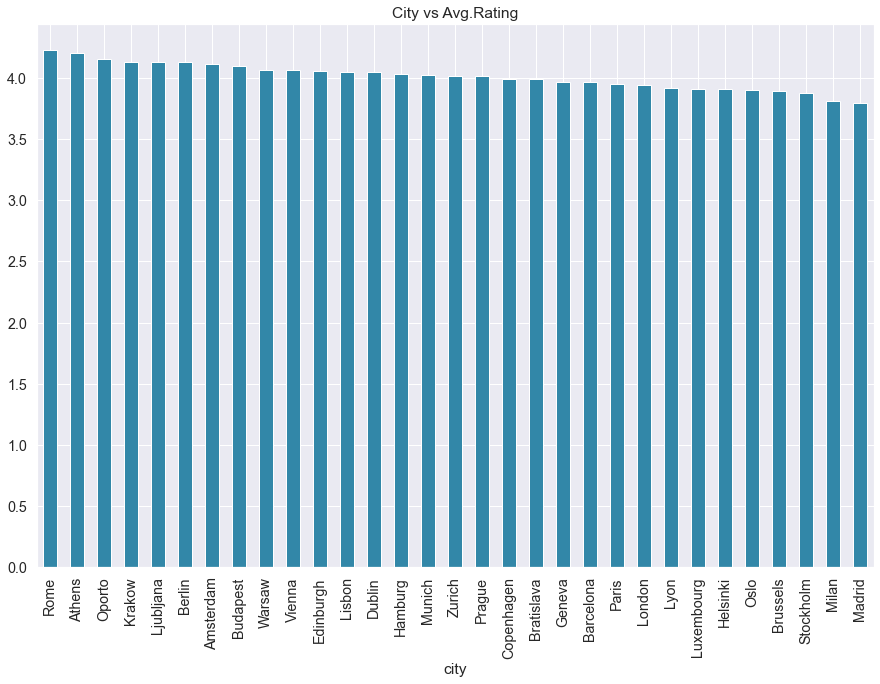

In [15]:
plt.figure(figsize=(15,10))
data.groupby('city')['rating'].mean().sort_values(ascending=False).plot(kind='bar',color = '#3287a8')
plt.title('City vs Avg.Rating')

**Observations:<br>**
As Expected Rome has highest Avg Rating but Edinburgh falls in this case.
Also all of the cities have a good avg rating ie close to 4.

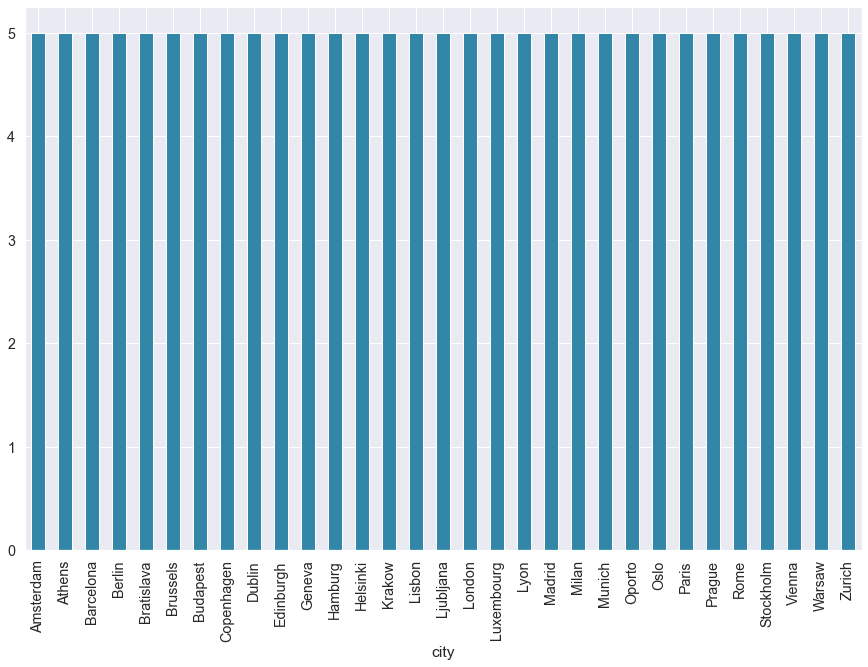

In [16]:
# Let's see which cities have good resturants to try?
plt.figure(figsize=(15,10))
data.groupby('city')['rating'].max().plot(kind='bar',color = '#3287a8')

**Observations:<br>**
All the cities have 5 star restaurtant rating.

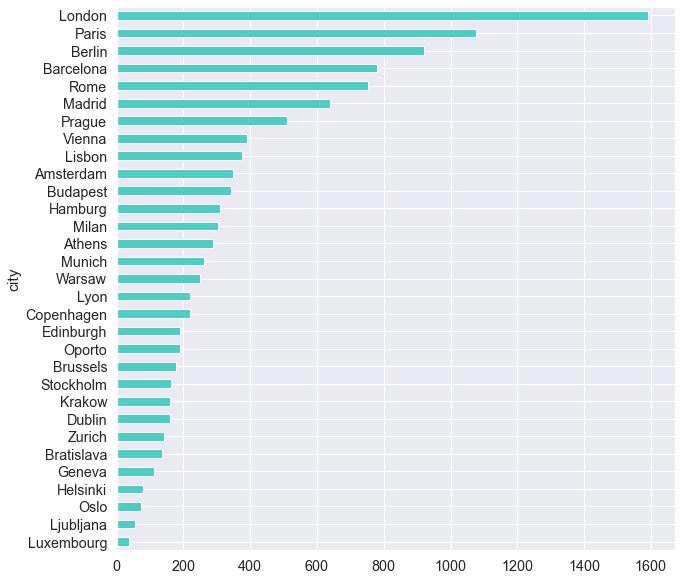

In [17]:
# Let's visualize which city has most no of 5 star rating restaurants
plt.figure(figsize=(10,10))
data[data.rating==5].groupby('city').rating.count().sort_values().plot(kind='barh',color='#4ECDC4')

**Observations:<br>**
So London and Paris has some good restaurants where people gets some good foods to try.

**So far we have analyzed Reviews,Rating and City. Let's see what price range have effect in ratings**

In [18]:
# No of unique price range across cities
data['price_range'].unique()

array(['$$ - $$$', '$$$$', '$', nan], dtype=object)

In [19]:
# we will impute '1$' to low, '2$ - 3$' to medium and '4$' to high along with 'NA' to NotAvailable(temporarily).

data['price_range'] = data['price_range'].fillna('NA')
# dictionary to fill  the values
price_ranges = {'$': 'Low', '$$ - $$$': 'Medium', '$$$$': 'High', 'NA': 'NotAvailable'}
data['price_range'] = data.price_range.map(price_ranges)
# No of records in each category
data['price_range'].value_counts()

Medium          54354
NotAvailable    47824
Low             19002
High             4307
Name: price_range, dtype: int64

In [20]:
# creating temp dataframe for visualization
nd = data.query("price_range!='NotAvailable'").groupby(by=['city','price_range']).size().to_frame().reset_index()
nd.columns = ['city', 'price_range', 'val']

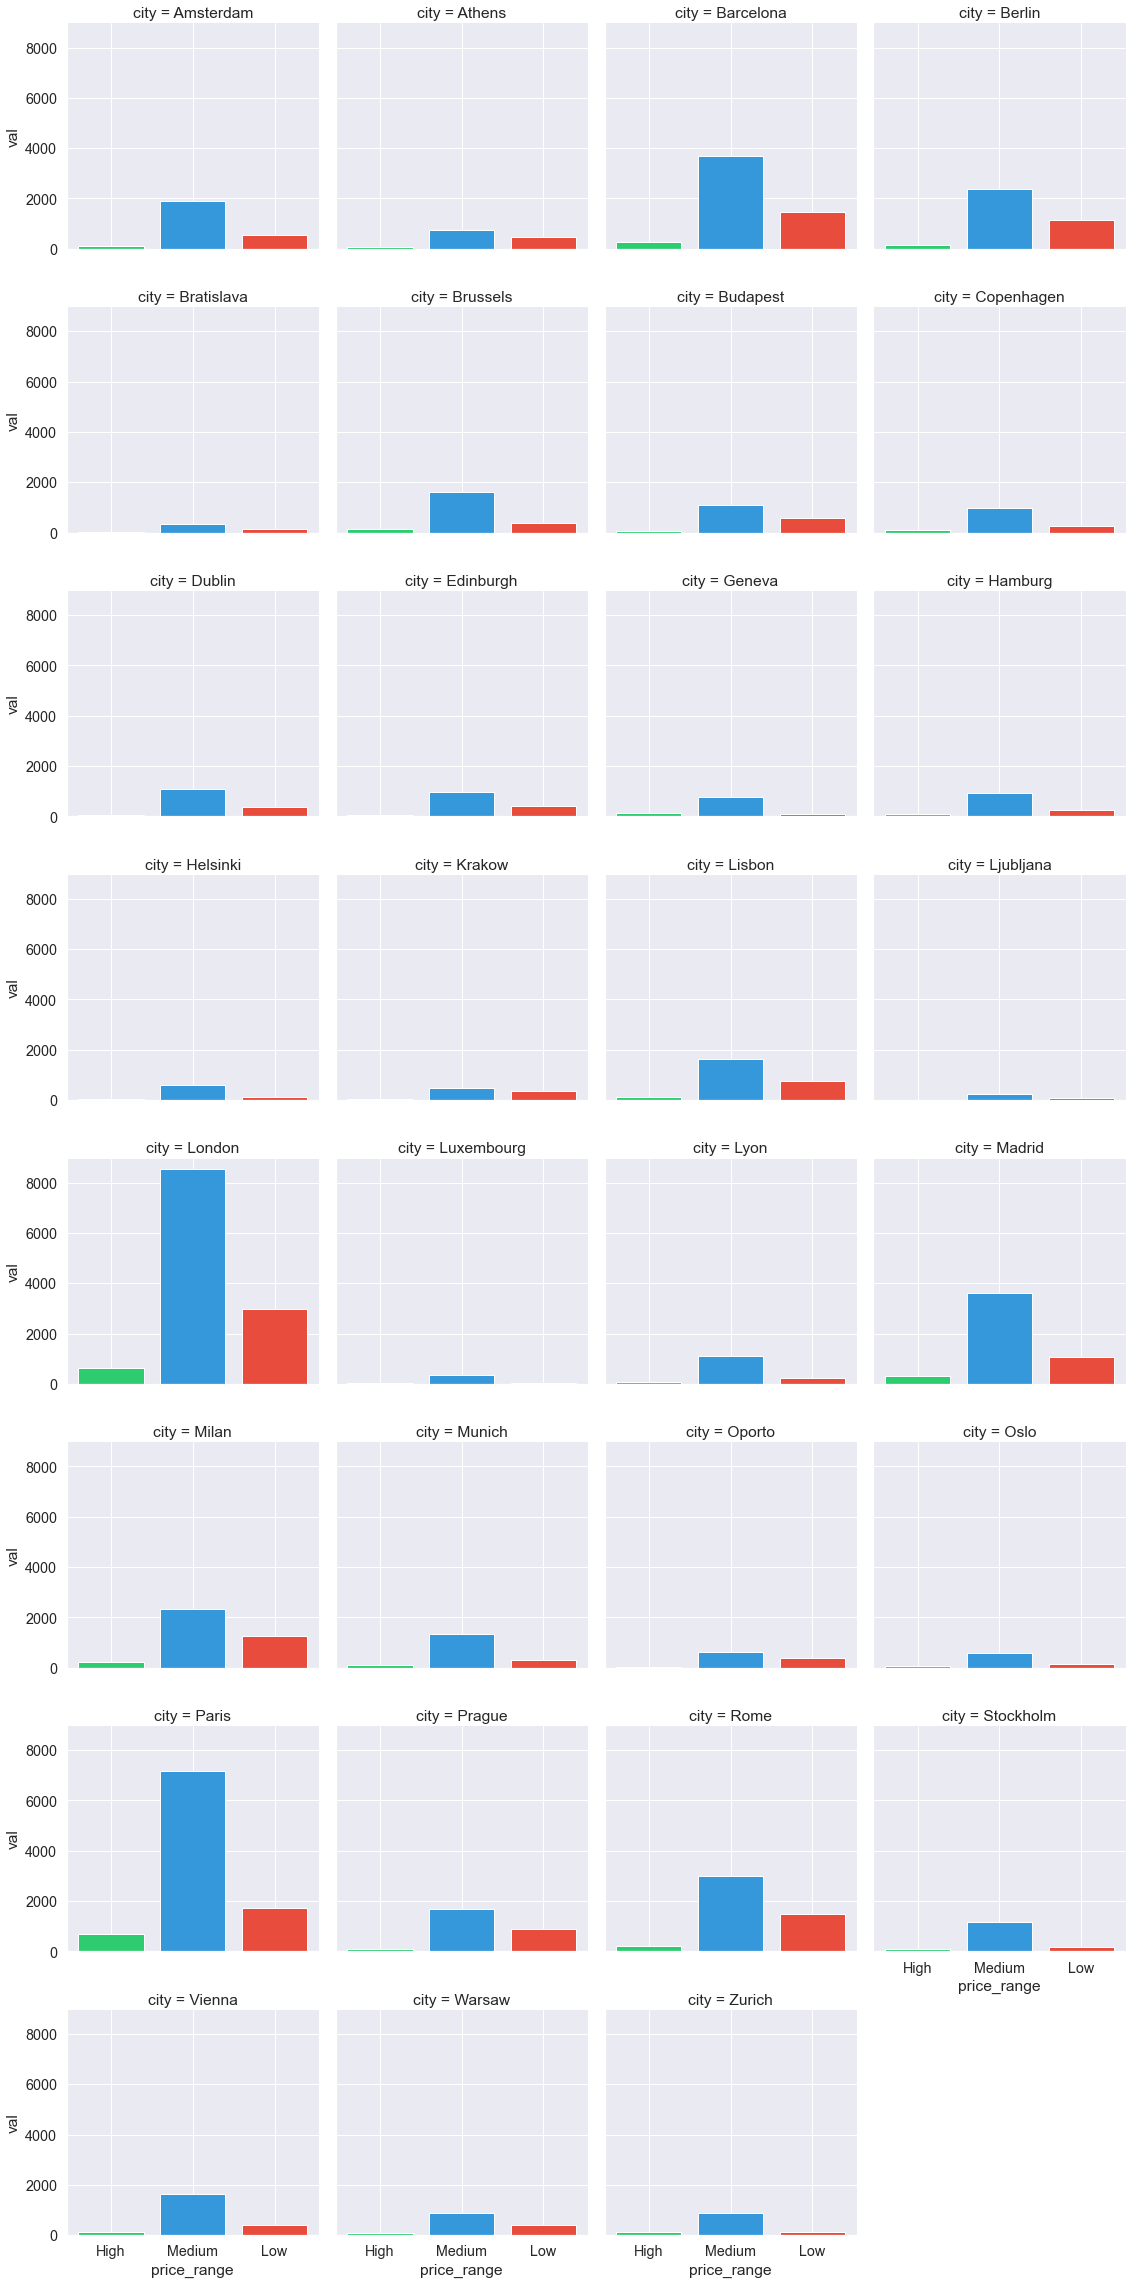

In [21]:
# Across cities what price range is preffered by tourist
sns.FacetGrid(data=nd,col='city',col_wrap=4,height=4,hue='price_range', hue_order = ['High', 'Medium', 'Low'], palette = ['#2ecc71', '#3498db', '#e74c3c']).map(plt.bar,'price_range','val')

**Observations:<br>**
Across Cities Medium price range restaurants are preffered by people(quite obvious).<br>
**Also worth noting that missing values in price range can be imputed by medium range.**

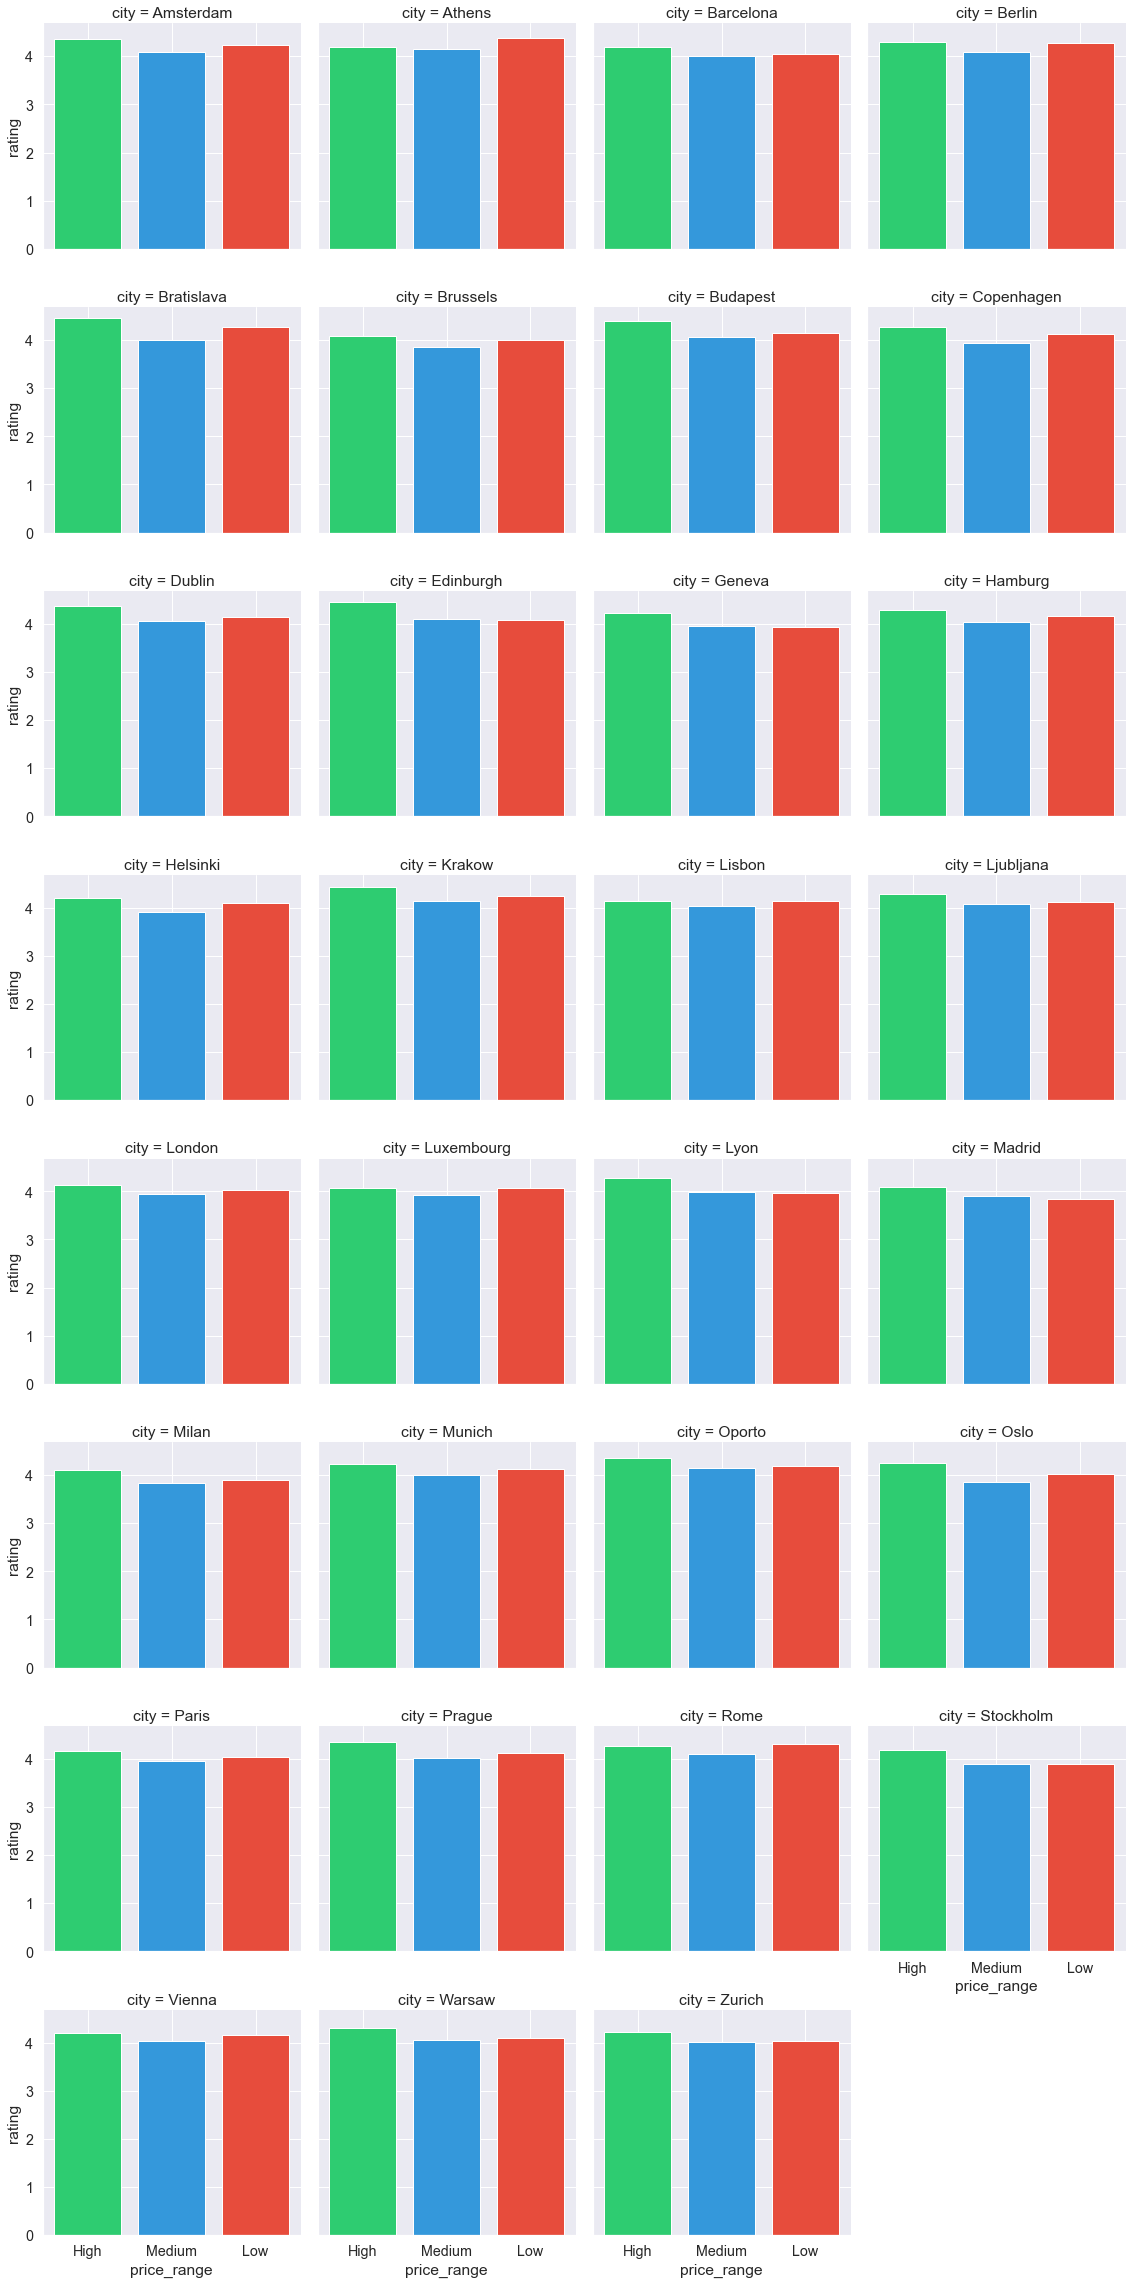

In [22]:
# Let's analyse how price range effect avg rating across cities

nd = data.query("price_range!='NotAvailable'").groupby(by=['city','price_range']).rating.mean().to_frame().reset_index()
sns.FacetGrid(data=nd,col='city',col_wrap=4,height=4,hue='price_range', hue_order = ['High', 'Medium', 'Low'], palette = ['#2ecc71', '#3498db', '#e74c3c']).map(plt.bar,'price_range','rating')


**Observations:<br>**
on an average high price has high average rating. Restaurants those are high priced also gets good reviews and rating by tourist.

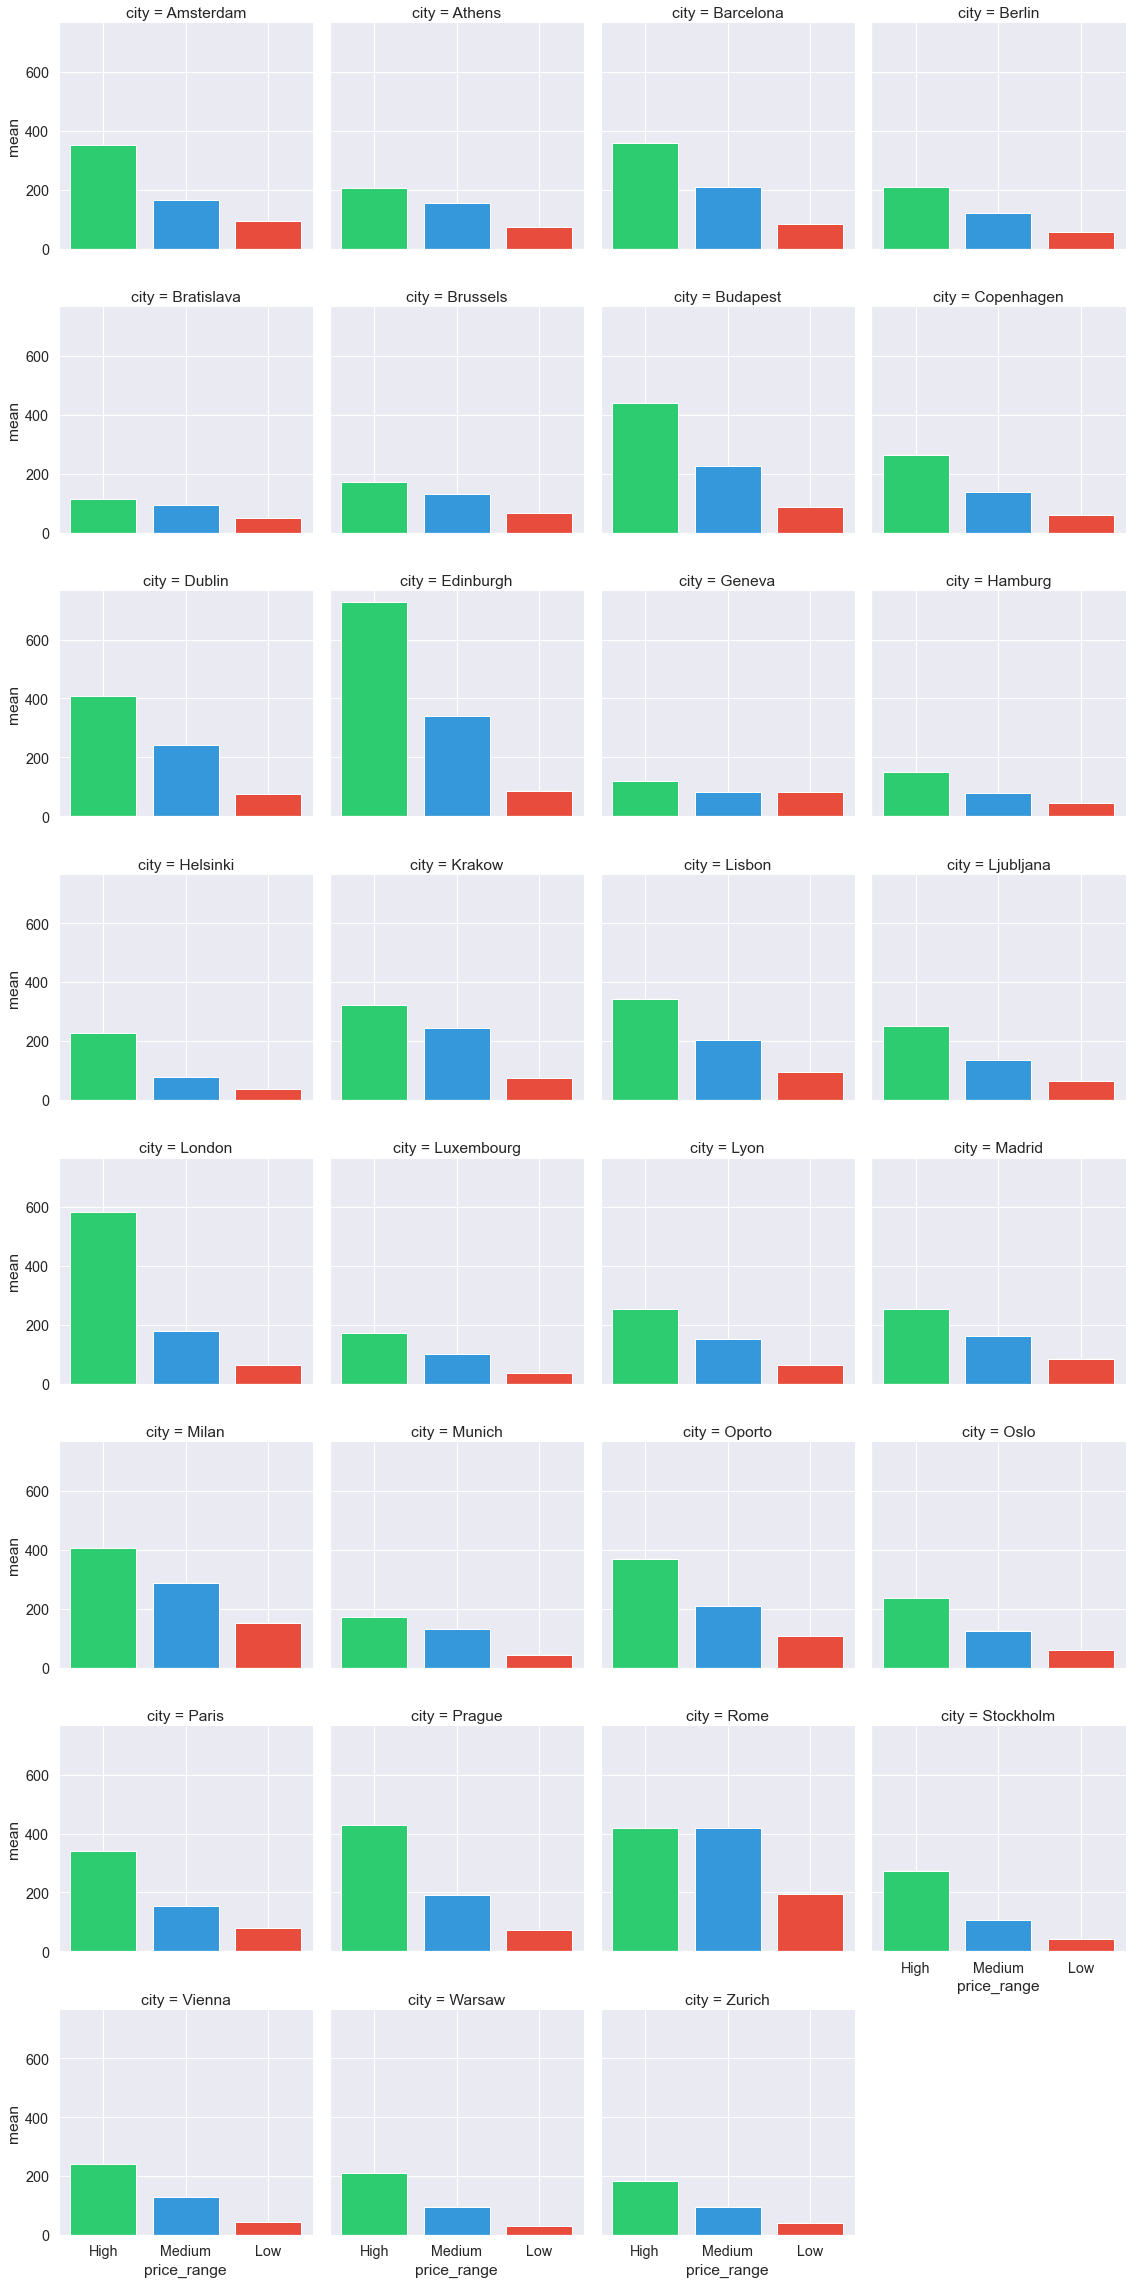

In [23]:
# Let's visualize the average number of reviews per price range: 
# does the price range somehow influence the possibility of a customer to leave a review

nd=data.query("price_range!='NotAvailable'").groupby(['city', 'price_range']).number_of_reviews.agg(['mean']).reset_index()

sns.FacetGrid(data=nd,col='city',col_wrap=4,height=4,hue='price_range', hue_order = ['High', 'Medium', 'Low'], palette = ['#2ecc71', '#3498db', '#e74c3c']).map(plt.bar,'price_range','mean')

**Observations:<br>**
High priced restaurants usually collect more reviews than medium and low ranged restaurants.so we can conclude
higher the expected quality and the higher the attention paid by the customers.

**The dataset avails of the column cuisine-style which stores the cuisine available in each of the reviewed places. This is an interesting starting point to understand how cuisines impact TripAdvisor's visitors.
First of all, we have to manage the list of cuisine styles in a way that we can use the data and produce some statistics. Since there's just one rating for each place, all the cuisine styles are stored in a single column: we assume that the rating given to each place is good for all the styles they propose.
The goal is to create a single row for each of the cuisine_styles available for each place.**

In [25]:
# https://stackoverflow.com/questions/52232742/how-to-use-ast-literal-eval-in-a-pandas-dataframe-and-handle-exceptions
def literal_return(val):
    try:
        return ast.literal_eval(val)
    except (ValueError, SyntaxError) as e:
        return val         

In [26]:
# converting datatype string list to list
data['cuisine_style'] = data['cuisine_style'].map(literal_return)
data['reviews'] = data['reviews'].map(literal_return)

In [27]:
data_new = data.loc[:, ['city', 'name', 'cuisine_style', 'rating', 'number_of_reviews']].copy()
data_new = data_new.explode('cuisine_style')
data_new.head()

,city,name,cuisine_style,rating,number_of_reviews
0,Amsterdam,Martine of Martine's Table,French,5.0,136.0
0,Amsterdam,Martine of Martine's Table,Dutch,5.0,136.0
0,Amsterdam,Martine of Martine's Table,European,5.0,136.0
1,Amsterdam,De Silveren Spiegel,Dutch,4.5,812.0
1,Amsterdam,De Silveren Spiegel,European,4.5,812.0


In [28]:
# how many no of unique cuisuine are servered in cities
data_new.cuisine_style.nunique()

127

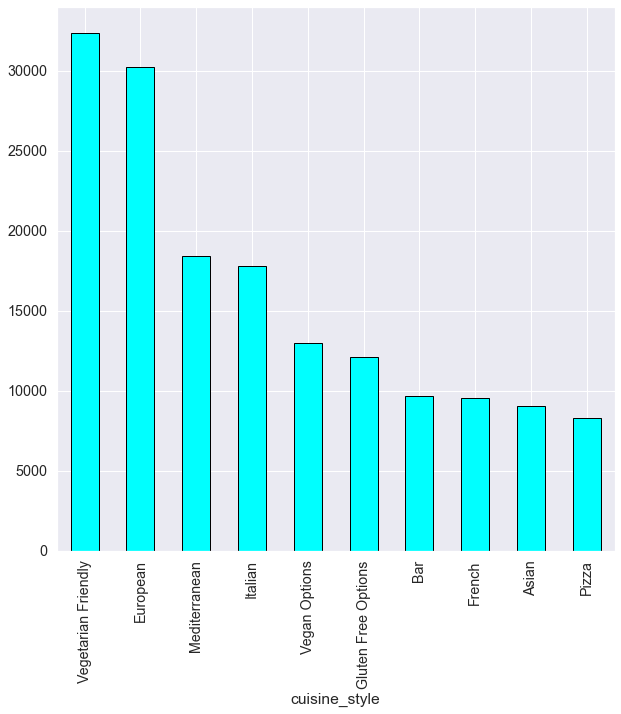

In [29]:
# plotting top 10 popular cuisine across cities
data_new.groupby(by='cuisine_style').size().sort_values(ascending=False).nlargest(10).plot(kind='bar',figsize=(10,10),color='cyan',edgecolor='black')

**Observations:<br>**
Vegetarian Friendly places are clearly the most popular ones, followed by mostly European-style cuisine.

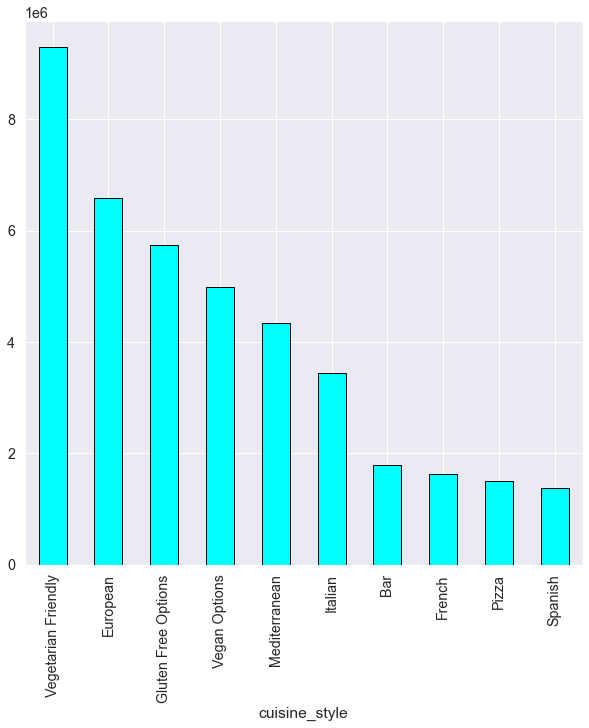

In [30]:
# Let's see which cuisine style has gattered most no of reviews. 
# For the sake of ease i'm considering only top 10 most reviewed cuisine
data_new.groupby('cuisine_style').number_of_reviews.sum().nlargest(10).sort_values(ascending=False).plot(kind='bar',figsize=(10,10),color='cyan',edgecolor='black')

**Observations:<br>**
Vegetarian Friendly,European-style cuisine again tops the list followed by glutten free and vegan. Definetly something new to try.

## Feature Engineering

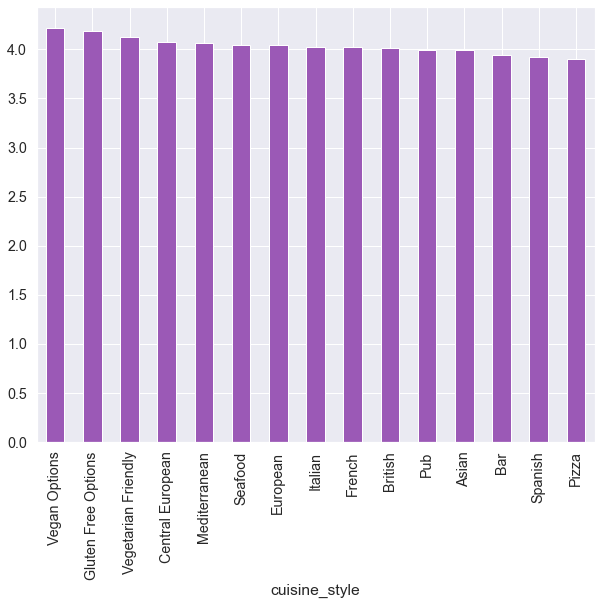

In [31]:
# visualizing top rated cuisines
idx = data_new.groupby('cuisine_style').number_of_reviews.sum().nlargest(15).index

data_new.loc[(data_new.rating.notna()) & (data_new.cuisine_style.isin(idx))].groupby('cuisine_style').rating.mean().sort_values(ascending=False).plot(kind='bar',color='#9b59b6')

**Observations:<br>**
Glutten free and vegan are highly rated followed by Vegetarian Friendly but European style restaurant falls in this case

In [32]:
# dropping null rows having reviews and ranking there is no way we can impute missing values for these fields
data.dropna(subset=['reviews', 'ranking'], axis=0,inplace=True)

In [33]:
# creating feature no of restaurants in each city
data['rests_per_city'] = data['city'].map(data.groupby(['city']).count().to_dict()['name'])
data.head()

,name,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,rests_per_city
0,Martine of Martine's Table,Amsterdam,"[French, Dutch, European]",1.0,5.0,Medium,136.0,"[[Just like home, A Warm Welcome to Wintry Ams...",3239
1,De Silveren Spiegel,Amsterdam,"[Dutch, European, Vegetarian Friendly, Gluten ...",2.0,4.5,High,812.0,"[[Great food and staff, just perfect], [01/06/...",3239
2,La Rive,Amsterdam,"[Mediterranean, French, International, Europea...",3.0,4.5,High,567.0,"[[Satisfaction, Delicious old school restauran...",3239
3,Vinkeles,Amsterdam,"[French, European, International, Contemporary...",4.0,5.0,High,564.0,"[[True five star dinner, A superb evening of f...",3239
4,Librije's Zusje Amsterdam,Amsterdam,"[Dutch, European, International, Vegetarian Fr...",5.0,4.5,High,316.0,"[[Best meal.... EVER, super food experience], ...",3239


In [34]:
# imputing the missing reviews with avg no of reviews per city
# replacing 0 with nan
data.number_of_reviews.replace({0:np.nan},inplace=True)
# filling with avg no of reviews per city
data.number_of_reviews.fillna(data.city.map(data.groupby(by='city').number_of_reviews.mean().round().to_dict()),inplace=True)

In [35]:
# lets see how many missing values are left
data.isna().sum()

name                     0
city                     0
cuisine_style        26778
ranking                  0
rating                   0
price_range              0
number_of_reviews        0
reviews                  0
rests_per_city           0
dtype: int64

In [36]:
data.price_range.value_counts()

Medium          53158
NotAvailable    40315
Low             18117
High             4150
Name: price_range, dtype: int64

In [37]:
# imputing NotAvailable with medium price as its evident from EDA that medium price ranged restaurants are highly preferred
data.price_range.replace({'NotAvailable':'Medium'},inplace=True)

In [38]:
# let's create frequency of review collected among cities
data['freq_of_review_per_city'] = data['number_of_reviews'].map(data.groupby(['number_of_reviews'])['number_of_reviews'].count().to_dict())

In [39]:
# creating feature % of reviews per rating per city
data['pct_of_rev_per_rating_per_city']=data.groupby(by=['city','rating']).number_of_reviews.transform('sum')/data.groupby(by=['city']).number_of_reviews.transform('sum')
data['pct_of_rev_per_rating_per_city']=(data['pct_of_rev_per_rating_per_city']*100)

In [40]:
# helper function for counting cuisine offered by restaurants across cities
def cuisine_count(ser):
    d = defaultdict(lambda : 1)
    for _,val in ser.iteritems():
        if type(val)==list:        
            for cuisine in val:
                d[cuisine]+=1 
                
    d=sorted(d.items(),key=lambda x:x[1],reverse=True)                
    return d   

In [41]:
# helper function for imputing missing cuisine list by most common cuisine per city
def select_best_cuisine(data):
    gp = data.groupby(by='city')
    dic = dict()
    for gp_name,gp_df in gp:
        x = cuisine_count(gp_df['cuisine_style'])    
        top_two = list(list(zip(*x[:2]))[0])
        dic[gp_name]=top_two
    return dic    

In [42]:
# imputing missing cuisine list by most common cuisine per city
dic = select_best_cuisine(data)
data.cuisine_style = data.cuisine_style.fillna(data.city.map(dic))

In [43]:
# creating feature no of cuisine offered by each restaurants
data['number_of_cuisine'] = data.cuisine_style.apply(len)

In [44]:
# creating feature how much each restaurant offers different types of cuisine per city

# helper function to extract cuisine list per city
def create_cuisine_dictionary(data):    
    d = dict()
    var = data.explode('cuisine_style').groupby('city').cuisine_style.agg(list)
    for i,j in zip(var.index,var.values):
        d[i]=j
    return d    

cuisine_dict = create_cuisine_dictionary(data)

In [45]:
def update_cuisine_weight(cuisine_dict):
    for key in cuisine_dict.keys():
        cuisine_series = pd.Series(cuisine_dict[key]).value_counts()
        cuisines_count = cuisine_series.sum()
        cuisines = {}
        for cuisine in cuisine_series.index:
            cuisines[cuisine] = cuisine_series[cuisine] / cuisines_count
        cuisine_dict[key] = cuisines    
    return cuisine_dict    

cuisine_dict = update_cuisine_weight(cuisine_dict)

In [46]:
# helper function to get total percent of cuisine offered by each restaurant per city
def get_cuisines_popularity(raw):
    result = 0
    if type(raw[2]) is list:
        for item in raw[2]:
            result = result+cuisine_dict[raw[1]][item]
    return result

data['cuisine_popularity'] = data.apply(get_cuisines_popularity,axis=1)

In [47]:
# separating reviews and date from condensed review column
data[['reviews_lst','date']]=data['reviews'].apply(pd.Series)

In [48]:
# imputing missing reviews
data['review_len'] = data.loc[:,'reviews_lst'].apply(len)
data.loc[data.review_len<1,'reviews_lst'] = np.nan
data.reviews_lst.ffill(inplace=True)
data.drop('review_len',axis=1,inplace=True)

In [49]:
# creating temp feature
data['dt_len'] = data.loc[:,'date'].apply(lambda x: len(x) if type(x)==list else np.nan)

In [50]:
data[['dt1','dt2']] = data['date'].apply(pd.Series)

data.dt1 = pd.to_datetime(data.dt1)
data.dt2 = pd.to_datetime(data.dt2)

# (df2.dt1.dt.month-df2.dt2.dt.month)

In [51]:
# duration between reviews
data['days_between_review'] = (data.dt1.dt.day-data.dt2.dt.day)

In [52]:
data.loc[data['days_between_review'].isna(),'days_between_review'] = -1

In [53]:
# dropping unwanted columns
data.drop(['cuisine_style', 'name', 'reviews', 'date', 'dt_len', 'dt1', 'dt2'],axis=1,inplace=True)

In [54]:
# top 5 rows of modified dataframe
data.head()

,city,ranking,rating,price_range,number_of_reviews,rests_per_city,freq_of_review_per_city,pct_of_rev_per_rating_per_city,number_of_cuisine,cuisine_popularity,reviews_lst,days_between_review
0,Amsterdam,1.0,5.0,Medium,136.0,3239,156,3.82531233,3,0.26767268,"[Just like home, A Warm Welcome to Wintry Amst...",2.0
1,Amsterdam,2.0,4.5,High,812.0,3239,8,44.31368793,4,0.45971436,"[Great food and staff, just perfect]",2.0
2,Amsterdam,3.0,4.5,High,567.0,3239,21,44.31368793,6,0.46977454,"[Satisfaction, Delicious old school restaurant]",0.0
3,Amsterdam,4.0,5.0,High,564.0,3239,15,3.82531233,7,0.48908650,"[True five star dinner, A superb evening of fi...",3.0
4,Amsterdam,5.0,4.5,High,316.0,3239,42,44.31368793,6,0.53983652,"[Best meal.... EVER, super food experience]",2.0


In [55]:
# importing libraries to handle text data
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer 

In [56]:
# helper function to join reviews
def join_str(val):
    try:
        return ' '.join(val)
    except :
        return val   
    
data.reviews_lst = data.reviews_lst.apply(join_str)    

In [57]:
# resetting dataframe index
data.index = range(len(data))

In [58]:
corpus = []
#looping through reviews to clean
for i in range(len(data.reviews_lst)):
    # column : "Review", row ith 
    review = re.sub('[^a-zA-Z]', ' ', data['reviews_lst'][i])
    #converting all characters to lowercase
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    #loop for stemming each word in string array at ith row
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    #rejoin all string array elements to create back into a string
    review = ' '.join(review)
    #append each string to create array of clean text
    corpus.append(review)

In [59]:
data.head(2)

,city,ranking,rating,price_range,number_of_reviews,rests_per_city,freq_of_review_per_city,pct_of_rev_per_rating_per_city,number_of_cuisine,cuisine_popularity,reviews_lst,days_between_review
0,Amsterdam,1.0,5.0,Medium,136.0,3239,156,3.82531233,3,0.26767268,Just like home A Warm Welcome to Wintry Amsterdam,2.0
1,Amsterdam,2.0,4.5,High,812.0,3239,8,44.31368793,4,0.45971436,Great food and staff just perfect,2.0


In [60]:
data.drop(columns=['reviews_lst'],axis=1,inplace=True)

In [61]:
# loading ml libraries
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [62]:
# separating feature and target
X = data.drop(['rating'],axis=1)
y = data.rating

In [63]:
# isolating continuous and categorical features
num_col = X._get_numeric_data().columns
cat_col = ['city','price_range']

In [64]:
# creating columntransformer to preprocess data for model
transformer = ColumnTransformer([('ss',StandardScaler(),num_col),
                                 ('ohe',OneHotEncoder(drop='first'),cat_col)])

X_new = transformer.fit_transform(X)

In [65]:
cv = CountVectorizer(ngram_range=(2, 2),max_features = 1500)
X_text = cv.fit_transform(corpus).toarray()

In [66]:
# stacking preprocessed features with vectorized text
X_final = np.hstack([X_new.toarray(),X_text])
X_final.shape

(115740, 1540)

In [67]:
# droping unwanted variables
del X,X_new,X_text

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X_final,y,test_size=0.2,stratify=y,shuffle=True,random_state=42)

In [69]:
X_train.shape,X_test.shape

((92592, 1540), (23148, 1540))

In [70]:
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [71]:
y_pred = rf_regressor.predict(X_test)

In [88]:
def convert_to_bin(rating_pred):
    if rating_pred <= 0.5:
        return 0.0
    if rating_pred <= 1.5:
        return 1.0
    if rating_pred <= 1.75:
        return 1.5
    if rating_pred <= 2.25:
        return 2.0
    if rating_pred <= 2.75:
        return 2.5
    if rating_pred <= 3.25:
        return 3.0
    if rating_pred <= 3.75:
        return 3.5
    if rating_pred <= 4.25:
        return 4.0
    if rating_pred <= 4.75:
        return 4.5
    return 5.0

In [94]:
y_pred_new = list(map(convert_to_bin,y_pred.tolist()))

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_new))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_new))
print('R-Squared:', metrics.r2_score(y_test, y_pred_new))

MAE: 0.0027864178330741316
MSE: 0.002019612925522723
R-Squared: 0.9955301354385145


In [95]:
r2 = metrics.r2_score(y_test, y_pred_new)
print('Adj R-Squared:', 1 - (1-r2)*(len(y_pred_new)-1)/(len(y_pred_new)-X_test.shape[1]-1))

Adj R-Squared: 0.9952115538943535


In [96]:
import joblib

In [97]:
joblib.dump(rf_regressor,'rf_regressor.joblib')

['rf_regressor.joblib']

# END